# Car Price Prediction
### Problem Statement
- With the covid 19 impact in the market, we have seen lot of changes in the car market. Now some cars are in demand hence making them costly and some are not in demand hence cheaper. One  of our clients works with small traders, who sell used cars. With the change in market due to covid 19 impact, our client is facing problems with their previous car price valuation machine learning models. So, they are looking for new machine learning models from new data. We have to make car price valuation model. This project contains two phase:
    - __Data Collection Phase__ : 
    You have to scrape at least 5000 used cars data. You can scrape more data as well, it’s up to you.  more the data better the model. In this section You need to scrape the data of used cars from websites (Olx, cardekho, Cars24 etc.) You need web scraping for this. You have to fetch data for different locations. The number ofcolumns for data doesn’t have limit, it’s up to you and your creativity. Generally, these columns are Brand, model, variant, manufacturing year, driven kilometers, fuel, number of owners, location and at last target variable Price of the car. This data is to give you a hint about important variables in used car model. You can make changes to it, you can add or you can remove some columns, it completely depends on the website from which you are fetching the data. Try to include all types of cars in your data for example- SUV, Sedans, Coupe, minivan, Hatchback.
    - __Model Building Phase__ :
     After collecting the data, you need to build a machine learning model. Before model building do all data pre-processing steps. Try different models with different hyper parameters and select the best model. Follow the complete life cycle of data science. Include all the steps like.
        1. Data Cleaning
        2. Exploratory Data Analysis
        3. Data Pre-processing
        4. Model Building
        5. Model Evaluation
        6. Selecting the best model

# Importing Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from scipy.stats import zscore
from sklearn.preprocessing  import power_transform, StandardScaler, LabelEncoder
from sklearn.feature_selection import VarianceThreshold, SelectKBest, f_classif
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split, GridSearchCV,cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import roc_curve, auc, roc_auc_score, plot_roc_curve, r2_score, classification_report, mean_absolute_error, mean_squared_error
from sklearn.metrics import confusion_matrix, mean_absolute_error, mean_squared_error
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR

import pickle

# Importing the DATASET

In [3]:
car=pd.read_csv("car_price.csv")

## Checking Top 5 rows Data

In [4]:
car.head()

,Unnamed: 0,Brand,Model,Variant,Manufacturing_Year,Driven_KiloMeters,Fuel,Location,Car_Price,Number_of_Owners
0,0,Hyundai,Hyundai Tucson,GLS AT,2021,"11,877 kms",Petrol,Ahmedabad,23.00 Lakh,NaN
1,1,Kia,Kia Seltos,GTX Plus,2019,"18,557 kms",Petrol,Ahmedabad,15.53 Lakh,NaN
2,2,Renault,Renault Duster,Petrol RXS CVT,2018,"33,139 kms",Petrol,Ahmedabad,7.11 Lakh,NaN
3,3,Honda,Honda City,i VTEC V,2016,"25,542 kms",Petrol,Ahmedabad,7.33 Lakh,NaN
4,4,Datsun,Datsun RediGO,T,2020,"23,840 kms",Petrol,Ahmedabad,3.81 Lakh,NaN


# EDA
## Checking Total Numbers of Rows and Column

In [5]:
car.shape

(5616, 10)

## Checking All Column Name

In [6]:
car.columns

Index(['Unnamed: 0', 'Brand', 'Model', 'Variant', 'Manufacturing_Year',
       'Driven_KiloMeters', 'Fuel', 'Location', 'Car_Price',
       'Number_of_Owners'],
      dtype='object')

## Checking Data Type of All Data

In [7]:
car.dtypes

Unnamed: 0             int64
Brand                 object
Model                 object
Variant               object
Manufacturing_Year     int64
Driven_KiloMeters     object
Fuel                  object
Location              object
Car_Price             object
Number_of_Owners      object
dtype: object

## Checking for Null Values

In [8]:
car.isnull().sum()

Unnamed: 0               0
Brand                    0
Model                    0
Variant                127
Manufacturing_Year       0
Driven_KiloMeters        0
Fuel                     0
Location                 0
Car_Price                0
Number_of_Owners      3863
dtype: int64

### Checking for Null Values through heatmap also

<AxesSubplot:>

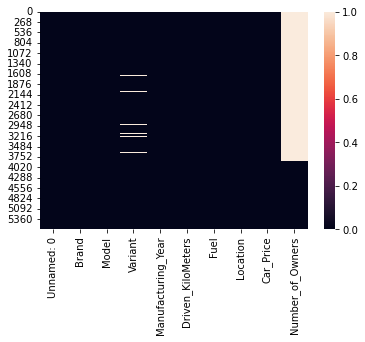

In [9]:
sns.heatmap(car.isnull())

##### We can see there are NULL values in our Dataset. So, we will handle it.

### Checking if - values present in dataset or not

In [10]:
(car=='-').sum()

Unnamed: 0            0
Brand                 0
Model                 0
Variant               0
Manufacturing_Year    0
Driven_KiloMeters     0
Fuel                  0
Location              0
Car_Price             0
Number_of_Owners      0
dtype: int64

## Checking total number of unique value in each column of Dataset

In [11]:
car.nunique()

Unnamed: 0            5616
Brand                   29
Model                  243
Variant               1237
Manufacturing_Year      23
Driven_KiloMeters     2885
Fuel                     9
Location                73
Car_Price             2322
Number_of_Owners         3
dtype: int64

Column "Unnamed: 0" contains serial no only. So, will drop this column

## Information about Data (Memory Used and Data Types)

In [12]:
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5616 entries, 0 to 5615
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Unnamed: 0          5616 non-null   int64 
 1   Brand               5616 non-null   object
 2   Model               5616 non-null   object
 3   Variant             5489 non-null   object
 4   Manufacturing_Year  5616 non-null   int64 
 5   Driven_KiloMeters   5616 non-null   object
 6   Fuel                5616 non-null   object
 7   Location            5616 non-null   object
 8   Car_Price           5616 non-null   object
 9   Number_of_Owners    1753 non-null   object
dtypes: int64(2), object(8)
memory usage: 438.9+ KB


## Data Cleaning

### Handling Null Values

In [11]:
#Droping column "Number_of_Owners" as it contains most missing value(3863) which is more than 50%.
car.drop(columns=['Number_of_Owners'],inplace=True)

In [12]:
#Droping column "Unnamed: 0" 
car.drop(columns=['Unnamed: 0'],inplace=True)

In [13]:
#We cannot fill any value in "Variant" as it is unique for each car model, and also we cann't drop column as it have very less missing value. So, we will drop those rows only.
car.dropna(inplace = True)

In [14]:
car.reset_index(inplace=True, drop=True)

#### Checking all values in each columns

In [15]:
for i in car.columns:
    print(car[i].value_counts(),"\n\n", "-"*100, "\n\n")

Maruti           1756
Hyundai          1046
Honda             526
Toyota            333
Renault           284
Tata              271
Mahindra          232
Ford              209
Audi              187
Volkswagen         99
Jeep               73
Chevrolet          68
Mercedes-Benz      64
Nissan             54
Skoda              52
MG                 44
KIA                44
Land               35
Bmw                31
BMW                29
Datsun             21
Kia                12
Volvo               5
Jaguar              5
Mercedes            5
Porsche             1
OpelCorsa           1
Rolls-Royce         1
Fiat                1
Name: Brand, dtype: int64 

 ---------------------------------------------------------------------------------------------------- 


Maruti                     692
Hyundai                    378
Honda                      156
Maruti Suzuki Wagon R      124
Renault                     99
                          ... 
Volvo S60 Cross Country      1
Volkswagen C

##### Observation:
1. Brand column:
    - Brand "BMW" and "Bmw" both is same brand so we will replacing "Bmw" with "BMW"  
    - Brand "KIA" and "Kia" both is same brand so we will replacing "Kia" with "KIA"  
2. Driven_KiloMeters column:
    - Replacing "KM","kms", "km", "," and ".0" as these are not required and column name itself defines these are KM values
3. Fuel column:
    - Fuel "Petrol" and "PETROL" both are same so will replace "Petrol" with "PETROL"
    - Fuel "Diesel" and "DIESEL" both are same so will replace "Diesel" with "DIESEL"
4. Location column:
    - Location "Delhi" and "Delhi NCR" is same so will replace "Delhi NCR" with "Delhi"
5. Car_Price column:
    - Removing "₹", "." and ","
    - Replacing value "Lakh" with "000"
6. Car_Price is object type so wil convert it's datatype from object to integer datatype

In [16]:
#Brand column:
car["Brand"]= car["Brand"].str.replace('Bmw', 'BMW')
car["Brand"]= car["Brand"].str.replace('Kia', 'KIA')

In [17]:
#Driven_KiloMeters column:
car["Driven_KiloMeters"]= car["Driven_KiloMeters"].str.replace('KM', ' ')

In [18]:
car["Driven_KiloMeters"]= car["Driven_KiloMeters"].str.replace('kms', '')

In [19]:
car["Driven_KiloMeters"]= car["Driven_KiloMeters"].str.replace('km', '')

In [20]:
car["Driven_KiloMeters"]= car["Driven_KiloMeters"].str.replace(',', '')

In [21]:
car["Driven_KiloMeters"]= car["Driven_KiloMeters"].str.replace('.0', '')

In [22]:
#Fuel column:
car["Fuel"].replace('Petrol', 'PETROL',inplace=True)

In [23]:
#Fuel column:
car["Fuel"].replace('Diesel', 'DIESEL',inplace=True)

In [24]:
#Location column:
car["Location"].replace('Delhi NCR', 'Delhi',inplace=True)

In [25]:
#Car_Price column:
car["Car_Price"]= car["Car_Price"].str.replace('₹', '')
car["Car_Price"]= car["Car_Price"].str.replace('.', '')
car["Car_Price"]= car["Car_Price"].str.replace(',', '')
car["Car_Price"]= car["Car_Price"].str.replace(' Lakh', '000')

In [26]:
car

,Brand,Model,Variant,Manufacturing_Year,Driven_KiloMeters,Fuel,Location,Car_Price
0,Hyundai,Hyundai Tucson,GLS AT,2021,11877,PETROL,Ahmedabad,2300000
1,KIA,Kia Seltos,GTX Plus,2019,18557,PETROL,Ahmedabad,1553000
2,Renault,Renault Duster,Petrol RXS CVT,2018,33139,PETROL,Ahmedabad,711000
3,Honda,Honda City,i VTEC V,2016,25542,PETROL,Ahmedabad,733000
4,Datsun,Datsun RediGO,T,2020,238,PETROL,Ahmedabad,381000
...,...,...,...,...,...,...,...,...
5484,Skoda,Skoda,1.6 TDI MT AMBITION PLUS Manual,2014,87642,DIESEL,Delhi,496199
5485,Hyundai,Hyundai,1.4 CRDI ASTA (O) Manual,2016,69388,DIESEL,Delhi,749199
5486,Maruti,Maruti,VXI Manual,2013,125,PETROL,Delhi,340599
5487,Maruti,Maruti,ZXI Plus Manual,2017,24676,PETROL,Delhi,789699


In [27]:
#checking again null values
car.isnull().sum()

Brand                 0
Model                 0
Variant               0
Manufacturing_Year    0
Driven_KiloMeters     0
Fuel                  0
Location              0
Car_Price             0
dtype: int64

In [28]:
#checking again total columns
car.columns

Index(['Brand', 'Model', 'Variant', 'Manufacturing_Year', 'Driven_KiloMeters',
       'Fuel', 'Location', 'Car_Price'],
      dtype='object')

In [29]:
car.shape

(5489, 8)

#### Converting Data Type of column "Car_Price" as this column contains numeric values but datatype is showing object

In [30]:
car['Car_Price']=pd.to_numeric(car['Car_Price'],errors='coerce')

In [31]:
car.dtypes

Brand                  object
Model                  object
Variant                object
Manufacturing_Year      int64
Driven_KiloMeters      object
Fuel                   object
Location               object
Car_Price             float64
dtype: object

In [32]:
#Checking Null value again after conversion of datatype
car.isnull().sum()

Brand                 0
Model                 0
Variant               0
Manufacturing_Year    0
Driven_KiloMeters     0
Fuel                  0
Location              0
Car_Price             6
dtype: int64

In [33]:
car.dropna(inplace = True)

In [34]:
car.reset_index(inplace=True, drop=True)

In [35]:
car.isnull().sum()

Brand                 0
Model                 0
Variant               0
Manufacturing_Year    0
Driven_KiloMeters     0
Fuel                  0
Location              0
Car_Price             0
dtype: int64

Now, there is no null value in our dataset.

In [36]:
car.shape

(5483, 8)

# Descriptive Statistics

In [38]:
car.describe()

,Manufacturing_Year,Car_Price
count,5483.000000,5.483000e+03
mean,2016.043407,8.558486e+05
std,3.333458,9.607719e+05
min,2000.000000,4.000000e+04
25%,2015.000000,4.150000e+05
50%,2017.000000,6.017990e+05
75%,2018.000000,9.250000e+05
max,2022.000000,9.900000e+06


So, we can see that only two column is containing continuous data and rest 6 column contains categorical data.

### Checking Description through heatmap also

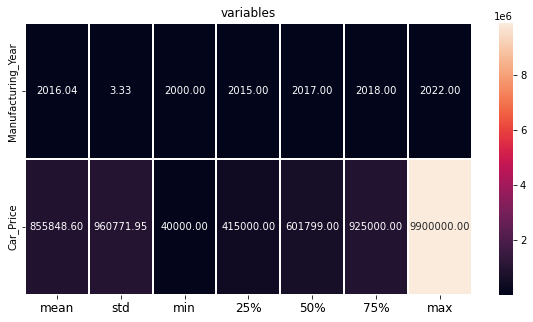

In [39]:
plt.figure(figsize=(10,5))
sns.heatmap(round(car.describe()[1:].transpose(),2),linewidth=2,annot=True,fmt='.2f')
plt.xticks(fontsize=18)
plt.xticks(fontsize=12)
plt.title('variables')
plt.show()

#### Observation of Describe of Datasets:
- The summary of this dataset looks good as there are no negative/ invalid value present.
- We can see the counts of "Manufacturing_Year" and "Car_Price" columns are 5483.000000 which means no null values are present.
- Total No of Rows: 5483 and Total No. of Columns: 8
- Only two column contains Continuous Data that is "Manufacturing_Year".
- We are determining Mean, Standard Deviation, Minimum and Maximum Values of each column.

1. __Manufacturing_Year:__
- Mean= 2016.044270,
- std= 3.332799,
- Min= 2000.000000,
- Max= 2022.000000

2. __Car_Price:__
- Mean= 5.483000e+03,
- std= 8.558486e+05,
- Min= 9.607719e+05,
- Max= 9.900000e+06

# Data Visualization
## Univariate Analysis
### Using Countplot 

<AxesSubplot:xlabel='count', ylabel='Brand'>

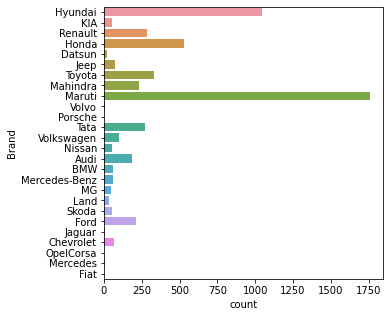

In [40]:
#Count Plot for "Brand" column
plt.figure(figsize=(5,5))
sns.countplot(y="Brand",data=car)

##### Here we can see that Maruti Brand car is available most (Total No= 1756) compare to other Brand 

<AxesSubplot:xlabel='count', ylabel='Model'>

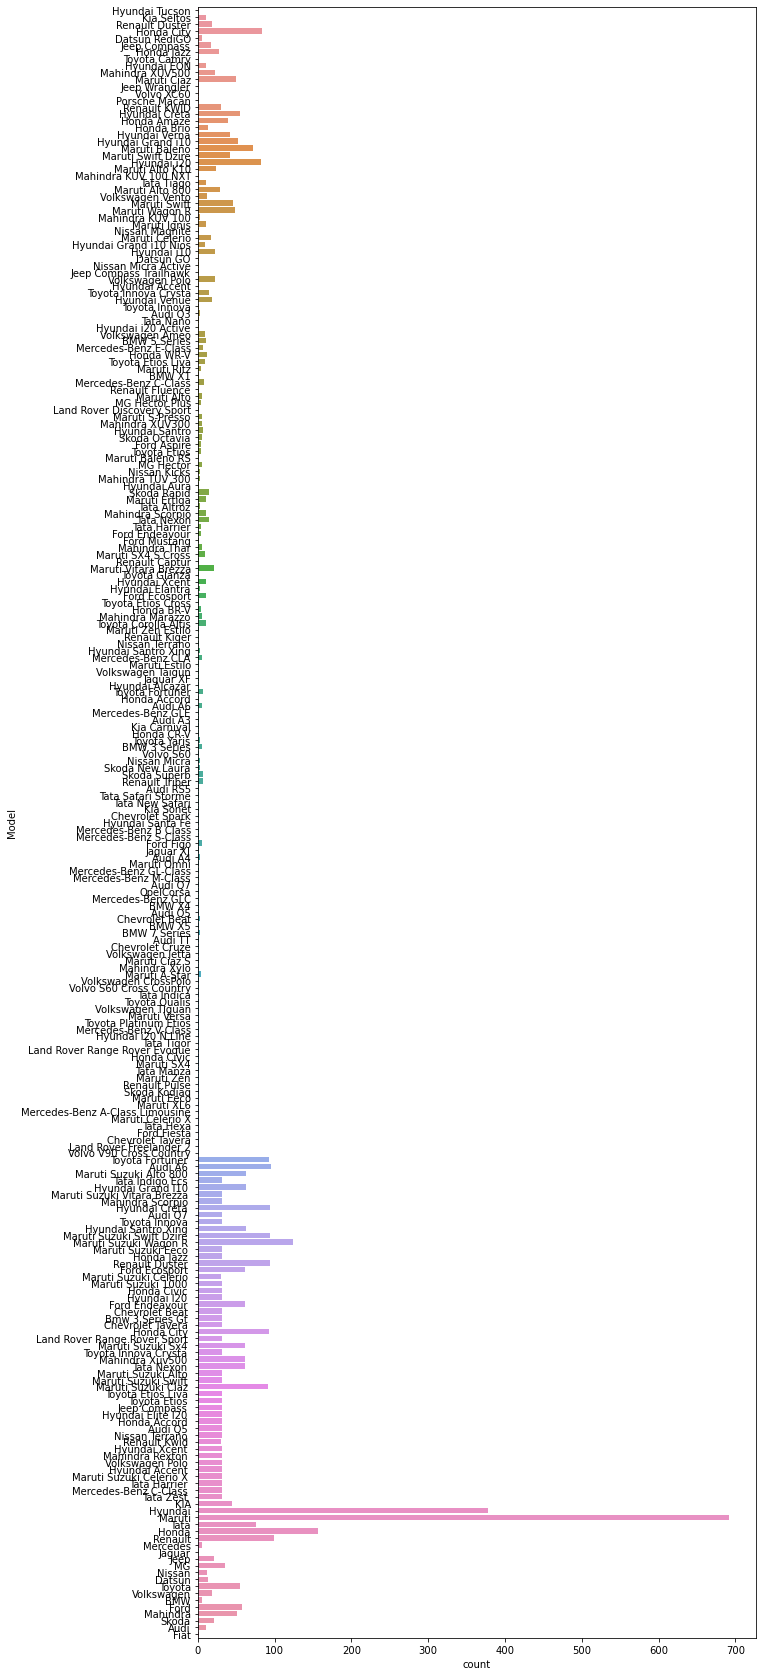

In [41]:
#Count Plot for "Model" column
plt.figure(figsize=(10,30))
sns.countplot(y="Model",data=car)

##### We can see Maruti Model Car is available most (Total No= 692) compare to other Brand

<AxesSubplot:xlabel='Manufacturing_Year', ylabel='count'>

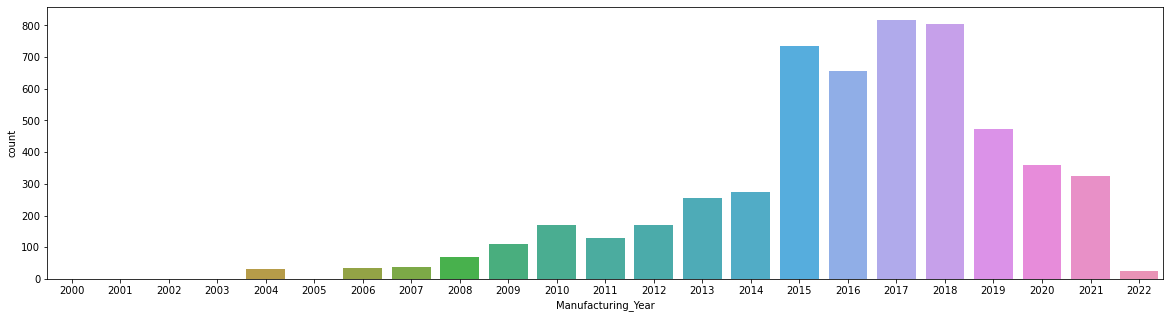

In [42]:
#Count Plot for "Manufacturing_Year" column
plt.figure(figsize=(20,5))
sns.countplot(x="Manufacturing_Year",data=car)

##### We can see cars manufactured in 2017 is available most (Total No= 819)

<AxesSubplot:xlabel='Fuel', ylabel='count'>

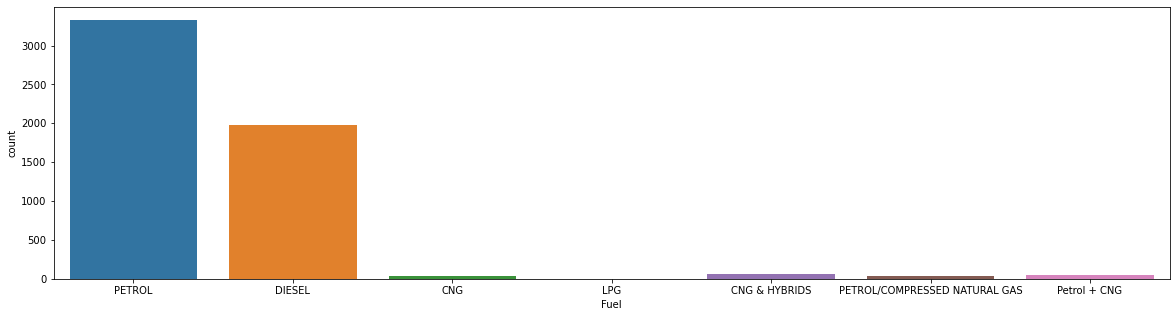

In [43]:
#Count Plot for "Fuel" column
plt.figure(figsize=(20,5))
sns.countplot("Fuel",data=car)

##### We can see cars using Fuel "Petrol" is available most (Total No= 3331)

<AxesSubplot:xlabel='count', ylabel='Location'>

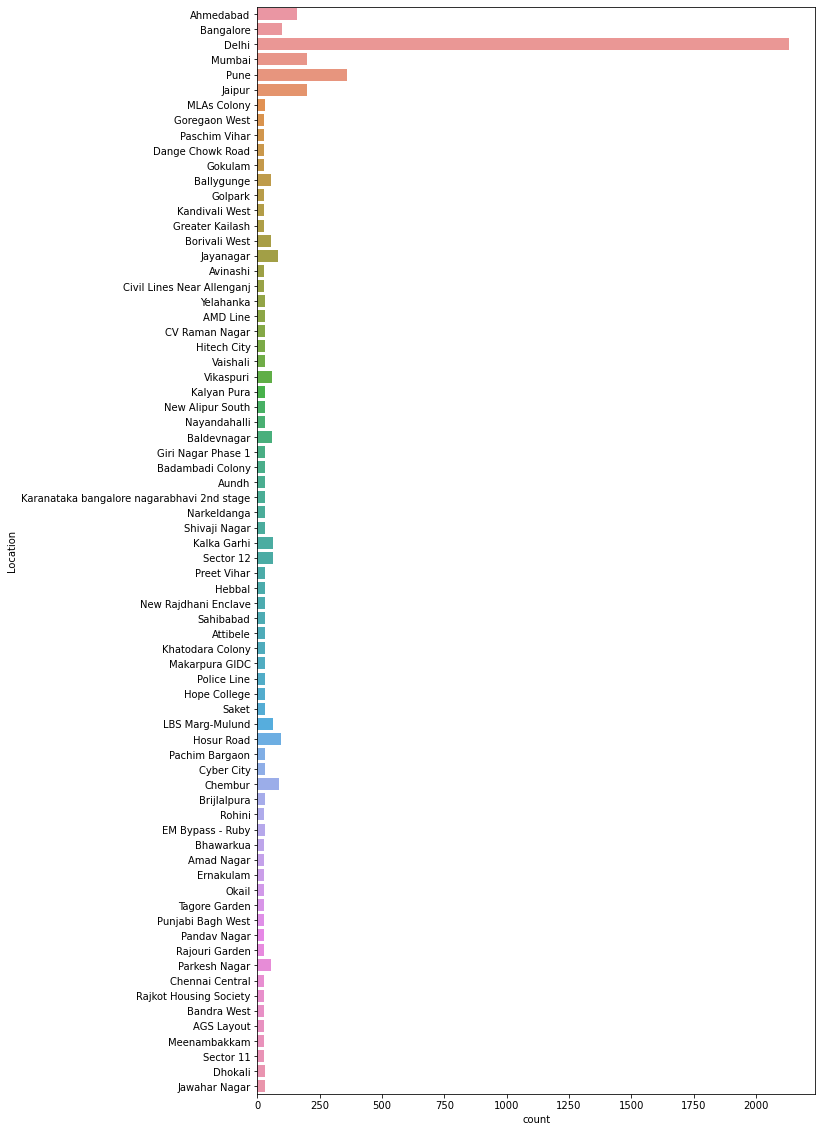

In [44]:
#Count Plot for "Location" column
plt.figure(figsize=(10,20))
sns.countplot(y="Location",data=car)

##### We can see most cars available at Location "Delhi" (Total No= 2133)

## Bivariate Analysis
### Using Catplot and Scatterplot

<Figure size 1440x720 with 0 Axes>

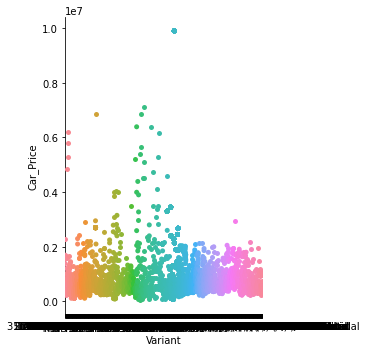

In [45]:
#catplot for comparision between "Variant" column and "Car_Price" column
plt.figure(figsize=(20,10))
sns.catplot(x="Variant",data=car, y='Car_Price')

<Figure size 1440x360 with 0 Axes>

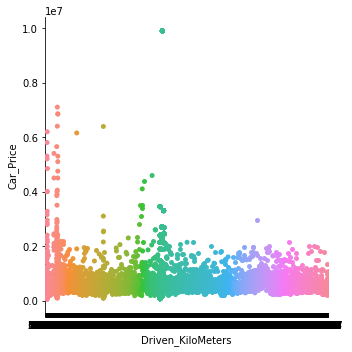

In [46]:
#CatPlot for comparision between "Driven_KiloMeters" and "Car_Price" column
plt.figure(figsize=(20,5))
sns.catplot("Driven_KiloMeters",data=car, y='Car_Price')

<AxesSubplot:xlabel='Brand', ylabel='Car_Price'>

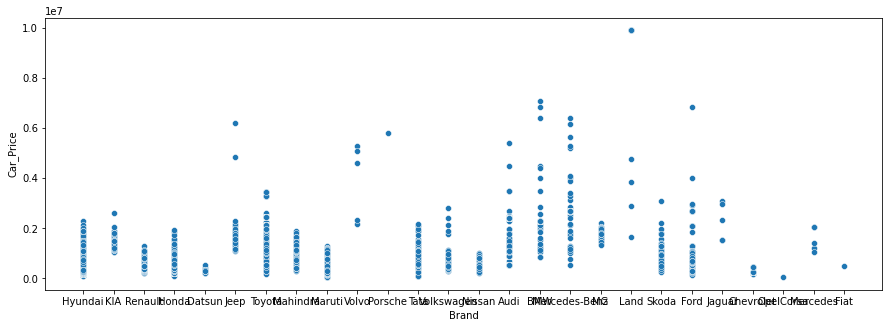

In [47]:
#scatterplot for comparision between "Brand" column and "Car_Price" column
plt.figure(figsize=(15,5))
sns.scatterplot(x="Brand",data=car, y='Car_Price')

<AxesSubplot:xlabel='Model', ylabel='Car_Price'>

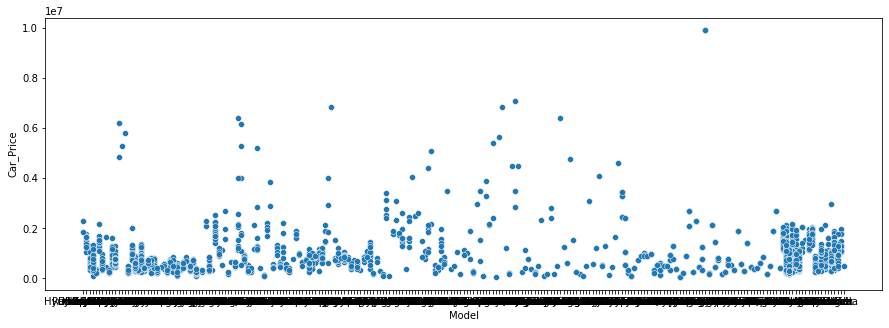

In [48]:
#scatterplot for comparision between "Model" and "Car_Price" column
plt.figure(figsize=(15,5))
sns.scatterplot(x="Model",data=car, y='Car_Price')

<AxesSubplot:xlabel='Manufacturing_Year', ylabel='Car_Price'>

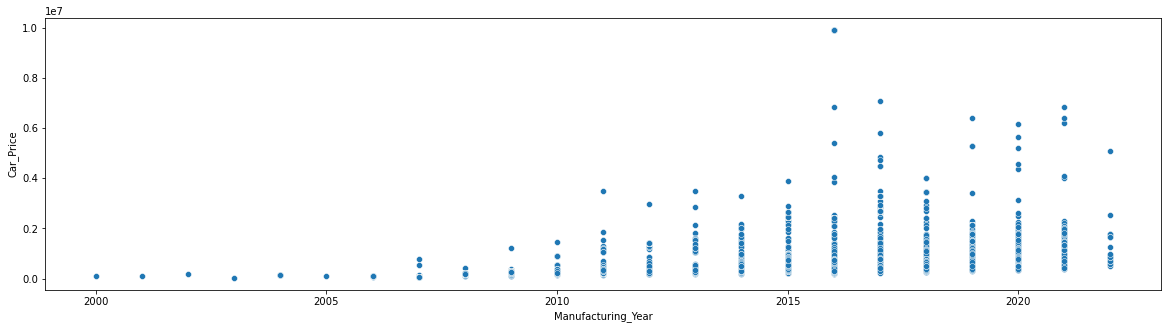

In [49]:
#scatterplot for comparision between "Manufacturing_Year" and "Car_Price" column
plt.figure(figsize=(20,5))
sns.scatterplot(x="Manufacturing_Year",data=car, y='Car_Price')

<AxesSubplot:xlabel='Fuel', ylabel='Car_Price'>

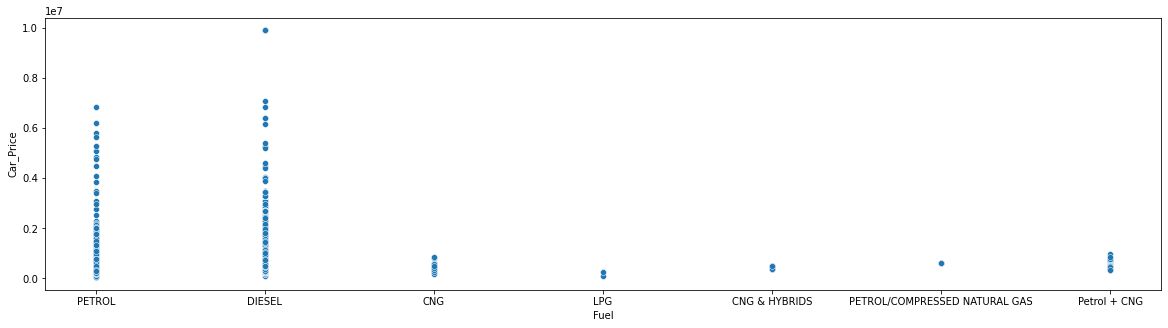

In [50]:
#scatterplot for comparision between "Fuel" and "Car_Price" column
plt.figure(figsize=(20,5))
sns.scatterplot(x="Fuel",data=car, y='Car_Price')

<AxesSubplot:xlabel='Location', ylabel='Car_Price'>

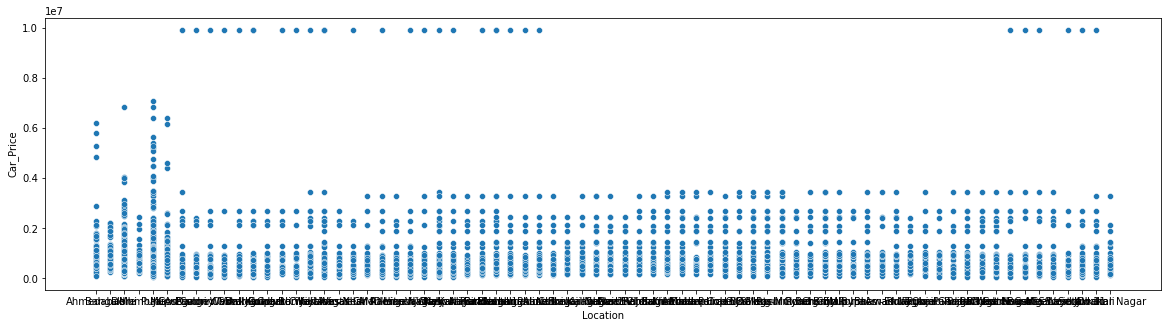

In [51]:
#scatterplot for comparision between "Fuel" and "Car_Price" column
plt.figure(figsize=(20,5))
sns.scatterplot(x="Location",data=car, y='Car_Price')

<Figure size 2880x1800 with 0 Axes>

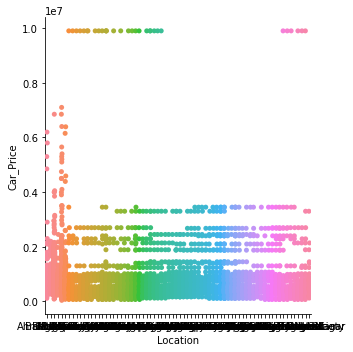

In [52]:
#Count Plot for "Location" column
plt.figure(figsize=(40,25))
sns.catplot(x="Location",data=car, y='Car_Price')

<Figure size 1800x1440 with 0 Axes>

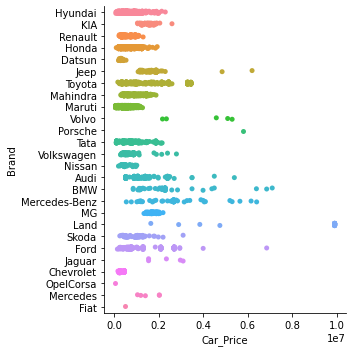

In [53]:
plt.figure(figsize=(25,20))
sns.catplot(x='Car_Price', y= 'Brand', data = car)
plt.show()

## Multivariate Analysis
### Using pairplot

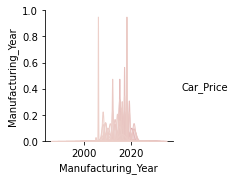

In [54]:
sns.pairplot(car,hue="Car_Price")

We can observe relationship between all the continuous column and the target column by this pairplot in pairs which are plotted on basis of target column.

# Label Encoding

In [55]:
#Encoding car Dataset
enc = LabelEncoder()
for i in car.columns:
    if car[i].dtypes=="object":
        car[i]=enc.fit_transform(car[i].values.reshape(-1,1))

In [56]:
car.dtypes

Brand                   int32
Model                   int32
Variant                 int32
Manufacturing_Year      int64
Driven_KiloMeters       int32
Fuel                    int32
Location                int32
Car_Price             float64
dtype: object

### Checking dataset after transformation

In [57]:
car.head()

,Brand,Model,Variant,Manufacturing_Year,Driven_KiloMeters,Fuel,Location,Car_Price
0,7,71,625,2021,75,4,2,2300000.0
1,10,90,639,2019,332,4,2,1553000.0
2,20,176,751,2018,804,4,2,711000.0
3,6,46,1211,2016,549,4,2,733000.0
4,3,28,917,2020,483,4,2,381000.0


# Checking Correlation

In [58]:
car.corr()

,Brand,Model,Variant,Manufacturing_Year,Driven_KiloMeters,Fuel,Location,Car_Price
Brand,1.000000,0.984207,0.123862,0.129157,-0.028763,0.015162,0.000459,-0.003022
Model,0.984207,1.000000,0.106493,0.088589,-0.023588,-0.013179,0.044661,0.002470
Variant,0.123862,0.106493,1.000000,0.005068,-0.072386,0.169128,-0.073757,-0.086074
Manufacturing_Year,0.129157,0.088589,0.005068,1.000000,-0.160688,-0.005101,-0.151555,0.231122
Driven_KiloMeters,-0.028763,-0.023588,-0.072386,-0.160688,1.000000,-0.166733,-0.019620,-0.085451
Fuel,0.015162,-0.013179,0.169128,-0.005101,-0.166733,1.000000,-0.122324,-0.309870
Location,0.000459,0.044661,-0.073757,-0.151555,-0.019620,-0.122324,1.000000,0.032826
Car_Price,-0.003022,0.002470,-0.086074,0.231122,-0.085451,-0.309870,0.032826,1.000000


This gives the correlation between the denpendent and independent variables.

In [59]:
car.corr()["Car_Price"].sort_values()

Fuel                 -0.309870
Variant              -0.086074
Driven_KiloMeters    -0.085451
Brand                -0.003022
Model                 0.002470
Location              0.032826
Manufacturing_Year    0.231122
Car_Price             1.000000
Name: Car_Price, dtype: float64

### We can observe :

- All columns are sorted in ascending order showing least to strong correlation with target column.
- 3 columns are negatively correlated and 4 columns are positively correlated.
- Column 'Fuel' is highly positively correlated with Target column and Column 'Brand' is highly negatively correlated with Target column

## Checking correlation with heatmap

<AxesSubplot:>

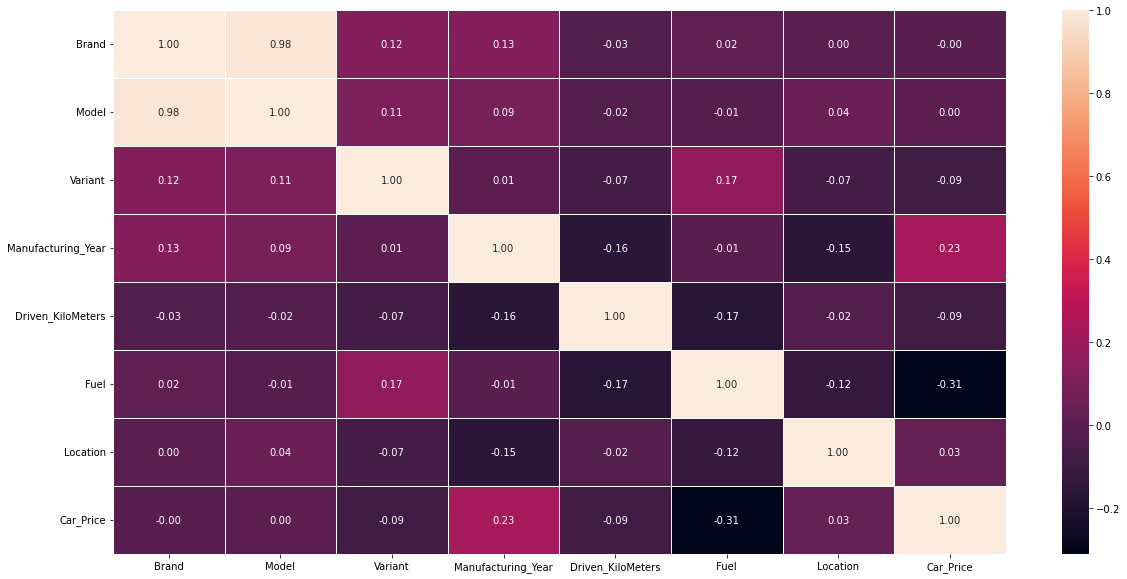

In [60]:
plt.figure(figsize=(20,10))
sns.heatmap(car.corr(),annot=True,annot_kws= {"size": 10}, linewidth=0.5, linecolor='white', fmt='.2f')

### Outcome of Correlation
- __Brand__ has __-0 percent__ correlation with the target column which can be considered as No correlation and is negatively correlated. 
- __Model__ has __-6 percent__ correlation with the target column which can be considered as good correlation and negatively correlated. 
- __Variant__ has __10 percent__ correlation with the target column which can be considered as good correlation and positively correlated. 
- __Manufacturing_Year__ has __29 percent__ correlation with the target column which can be considered as good correlation and positively correlated. 
- __Driven_KiloMeters__ has __4 percent__ correlation with the target column which can be considered as weak correlation and positively correlated. 
- __Fuel__ has __33 percent__ correlation with the target column which can be considered as strong correlation and positively correlated. 
- __Location__ has __-21 percent__ correlation with the target column which can be considered as weak correlation and negatively correlated. 

 - Max correlation is with __Fuel__
 - Min correlation is with __Brand__

## Checking correlation with barplot

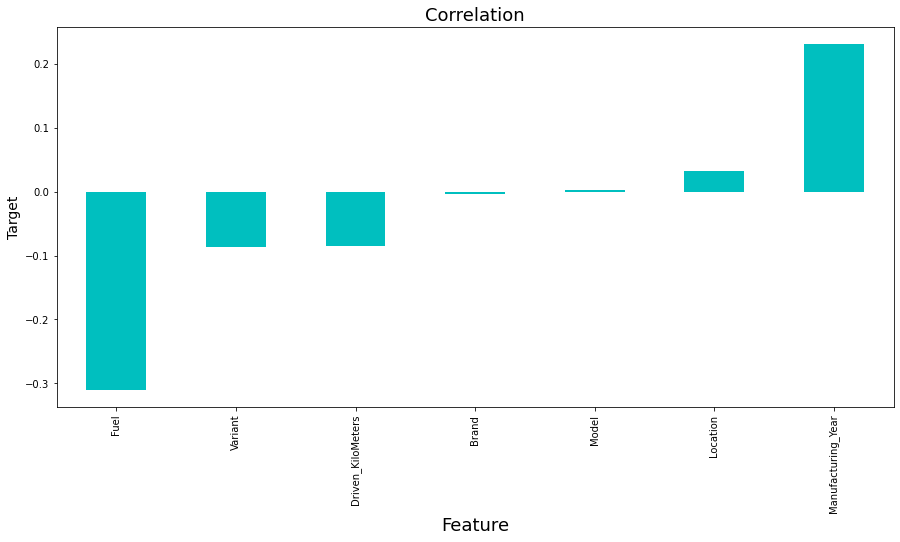

In [61]:
plt.figure(figsize=(15,7))
car.corr()['Car_Price'].sort_values(ascending=True).drop(['Car_Price']).plot(kind='bar',color='c')
plt.xlabel('Feature',fontsize=18)
plt.ylabel('Target',fontsize=14)
plt.title('Correlation',fontsize=18)
plt.show()

#### Observation:
- Here we can see there is least correlation between Brand column and Target Column, Car_Price. 
- Target column (Car_Price) has Highest Positively Correlation is with Fuel.
- Target column (Car_Price) has Highest Negatively Correlation is with Brand.

In [62]:
car.columns

Index(['Brand', 'Model', 'Variant', 'Manufacturing_Year', 'Driven_KiloMeters',
       'Fuel', 'Location', 'Car_Price'],
      dtype='object')

# Checking Outliers

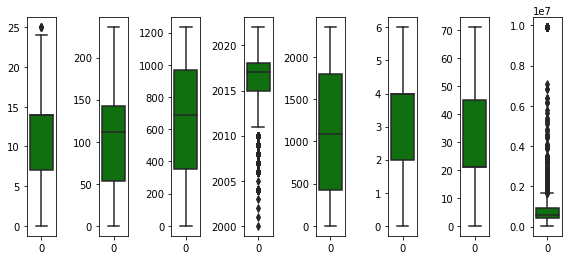

In [63]:
collist=car.columns.values
ncol=8
nrows=7
plt.figure(figsize=(ncol,3*ncol))
for i in range(0,len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.boxplot(data=car[collist[i]],color='green',orient='v')
    plt.tight_layout()

### Observation:
- __Outliers present in columns:__ "Brand", "Manufacturing_Year" and "Car_Price".
- But we will not remove Outliers from "Brand" column as it is categorical column and from "Car_Price" column as it is a target column.
- __Outliers not present in columns:__ 'Model', 'Variant','Driven_KiloMeters', 'Fuel' and 'Location'.

# Removing Outliers
## 1.1 Zscore method using Scipy


In [64]:
#  Outliers will be removed only from Continuous column i.e; "Manufacturing_Year". 
# We will not remove outliers from Categorical column i.e; "Brand".

variable = car[['Manufacturing_Year']]

z=np.abs(zscore(variable))

# Creating new dataframe
car_price = car[(z<3).all(axis=1)]

In [65]:
z.head()

,Manufacturing_Year
0,1.487058
1,0.887026
2,0.587010
3,0.013023
4,1.187042


In [66]:
car_price.head()

,Brand,Model,Variant,Manufacturing_Year,Driven_KiloMeters,Fuel,Location,Car_Price
0,7,71,625,2021,75,4,2,2300000.0
1,10,90,639,2019,332,4,2,1553000.0
2,20,176,751,2018,804,4,2,711000.0
3,6,46,1211,2016,549,4,2,733000.0
4,3,28,917,2020,483,4,2,381000.0


In [67]:
print("Old DataFrame data in Rows and Column:",car.shape)
print("New DataFrame data in Rows and Column:",car_price.shape)
print("Total Dropped rows:",car.shape[0]-car_price.shape[0])

Old DataFrame data in Rows and Column: (5483, 8)
New DataFrame data in Rows and Column: (5413, 8)
Total Dropped rows: 70


### 1.2 Percentage Data Loss using Zscore

In [68]:
loss_percent=(5489-5419)/5489*100
print("loss_percent= ",loss_percent,"%")

loss_percent=  1.275277828384041 %


## 2.1 IQR (Inter Quantile Range) method

In [69]:
#1st quantile
Q1=variable.quantile(0.25)

# 3rd quantile
Q3=variable.quantile(0.75)

#IQR
IQR=Q3 - Q1
car_price_pred=car[~((car < (Q1 - 1.5 * IQR)) |(car > (Q3 + 1.5 * IQR))).any(axis=1)]

In [70]:
print("Old DataFrame data in Rows and Column:",car.shape)
print("\nNew DataFrame data in Rows and Column:",car_price_pred.shape)
print("\nTotal Dropped rows:",car.shape[0]-car_price_pred.shape[0])

Old DataFrame data in Rows and Column: (5483, 8)

New DataFrame data in Rows and Column: (5027, 8)

Total Dropped rows: 456


### 2.2 Percentage Data Loss using IQR

In [71]:
loss_perc = (5489-5033)/5489*100
print("loss_percent= ",loss_perc,"%")

loss_percent=  8.307524139187466 %


##### We can check by using IQR method there is large data loss in comparision to Zscore method. So, we will consider Zscore method.

# Checking Skewness

In [72]:
car_price.skew()

Brand                 0.181949
Model                 0.283178
Variant              -0.052374
Manufacturing_Year   -0.703623
Driven_KiloMeters    -0.068305
Fuel                 -0.441923
Location              0.640418
Car_Price             5.656679
dtype: float64

## Checking skweness through Data Visualization also

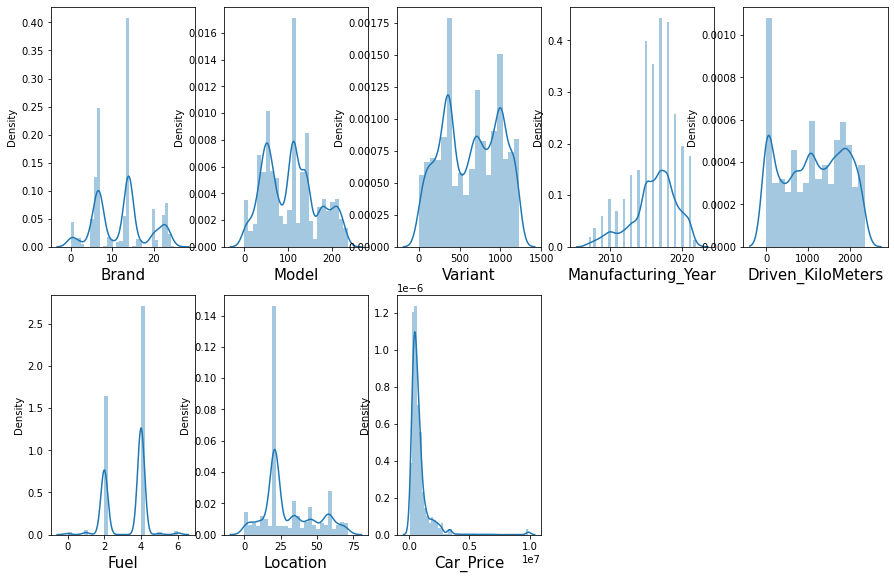

In [73]:
plt.figure(figsize=(15,15), facecolor='white')
plotnumber = 1

for column in car_price:
    if plotnumber<=15:
        ax = plt.subplot(3,5,plotnumber)
        sns.distplot(car_price[column])
        plt.xlabel(column,fontsize=15)
    plotnumber+=1
plt.show()

### Observation:
- Skewness threshold taken is +/-0.25
- All the columns are not normallly distributed, they are skewed.
- Columns which are having skewness: 'Brand', 'Model', 'Manufacturing_Year', 'Fuel', 'Car_Price'. 
- The 'Fuel' column data is negatively highly skewed and 'Location' is positively highly skewed
- Since 'Brand', 'Model', 'Fuel' are categorical column so we will not remove skewness and 'Car_Price' is Target Column so we can not remove skewness. 
- So we will remove skewness from Manufacturing_Year column as it contains continuous data.

## Removing skewness using yeo-johnson method

In [74]:
collist=['Manufacturing_Year']
car_price[collist]=power_transform(car_price[collist],method='yeo-johnson')
car_price[collist]

,Manufacturing_Year
0,1.642232
1,0.922537
2,0.574776
3,-0.097454
4,1.278296
...,...
5478,-0.739757
5479,-0.097454
5480,-1.050095
5481,0.234837


### checking skewness after removal

In [75]:
car_price.skew()

Brand                 0.181949
Model                 0.283178
Variant              -0.052374
Manufacturing_Year   -0.521735
Driven_KiloMeters    -0.068305
Fuel                 -0.441923
Location              0.640418
Car_Price             5.656679
dtype: float64

Still we can see skewness is present but from earlier it is removed.

### Checking through Visualization

<AxesSubplot:xlabel='Manufacturing_Year', ylabel='Density'>

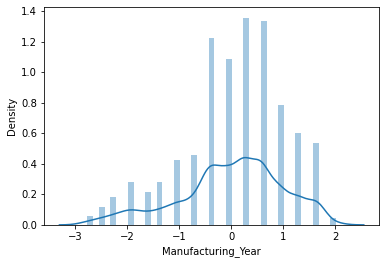

In [76]:
sns.distplot(car_price['Manufacturing_Year'])

# Data preprocessing

## Spliting data into Target and Features

In [77]:
x=car_price.drop("Car_Price",axis=1)
y=car_price["Car_Price"]

In [78]:
x.columns

Index(['Brand', 'Model', 'Variant', 'Manufacturing_Year', 'Driven_KiloMeters',
       'Fuel', 'Location'],
      dtype='object')

In [79]:
x.head()

,Brand,Model,Variant,Manufacturing_Year,Driven_KiloMeters,Fuel,Location
0,7,71,625,1.642232,75,4,2
1,10,90,639,0.922537,332,4,2
2,20,176,751,0.574776,804,4,2
3,6,46,1211,-0.097454,549,4,2
4,3,28,917,1.278296,483,4,2


In [80]:
y.head()

0    2300000.0
1    1553000.0
2     711000.0
3     733000.0
4     381000.0
Name: Car_Price, dtype: float64

In [81]:
x.shape, y.shape

((5413, 7), (5413,))

# Scaling data using Standard Scaler

In [82]:
scaler = StandardScaler()
x = pd.DataFrame(scaler.fit_transform(x), columns = x.columns)

In [83]:
x.head()

,Brand,Model,Variant,Manufacturing_Year,Driven_KiloMeters,Fuel,Location
0,-0.810184,-0.610846,-0.039789,1.642232,-1.413423,0.723823,-1.601946
1,-0.328258,-0.288392,0.000313,0.922537,-1.062234,0.723823,-1.601946
2,1.278161,1.171135,0.321125,0.574776,-0.417250,0.723823,-1.601946
3,-0.970826,-1.035127,1.638746,-0.097454,-0.765705,0.723823,-1.601946
4,-1.452752,-1.340609,0.796614,1.278296,-0.855894,0.723823,-1.601946


# Checking for Multicolinearity
## VIF (Variance Inflation factor)

In [84]:
vif = pd.DataFrame()
vif['VIF values']= [variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
vif['Features'] = x.columns
vif

,VIF values,Features
0,36.587438,Brand
1,36.172661,Model
2,1.047921,Variant
3,1.140527,Manufacturing_Year
4,1.075751,Driven_KiloMeters
5,1.090563,Fuel
6,1.096371,Location


##### The VIF value is more than 10 in the columns 'Brand', 'Model'. But column 'Brand' is having highest VIF value. So, we will drop column 'Brand'. 

In [85]:
x = x.drop(['Brand'],axis=1)

In [86]:
#Checking again Multicolinearity using VIF
vif = pd.DataFrame()
vif['VIF values']= [variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
vif['Features'] = x.columns
vif

,VIF values,Features
0,1.035566,Model
1,1.043016,Variant
2,1.090540,Manufacturing_Year
3,1.073187,Driven_KiloMeters
4,1.071377,Fuel
5,1.052502,Location


##### Now, we can check Multicolinearity is removed from the columns as VIF value of all columns are less than 10.

# Variance Threshold Method
It removes all features which variance doesn't meet some threshold. By default, it removes all zero-variance features.

In [87]:
var_threshold = VarianceThreshold(threshold=0)
var_threshold.fit(x)

VarianceThreshold(threshold=0)

In [88]:
var_threshold.get_support()

array([ True,  True,  True,  True,  True,  True])

In [89]:
x.columns[var_threshold.get_support()]

Index(['Model', 'Variant', 'Manufacturing_Year', 'Driven_KiloMeters', 'Fuel',
       'Location'],
      dtype='object')

In [90]:
# taking  out  all the  constant  columns 
cons_columns = [column for column in x.columns
               if column not in x.columns[var_threshold.get_support()]]
print(len(cons_columns))

0


##### So we can see that, with the help of variance threshold method, we got to know all the features here are important. So, we will create model now.

# Creating Model

### Finding the best random state among all the models
On the basis of target column as it contains continuous data, we will understand this by Regression Problem

In [91]:
maxAcc = 0
maxRS=0
for i in range(1,100):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = .20, random_state = i)
    modDTR =  DecisionTreeRegressor()
    modDTR.fit(x_train,y_train)
    pred = modDTR.predict(x_test)
    acc  = r2_score(y_test,pred)
    if acc>maxAcc:
        maxAcc=acc
        maxRS=i
print(f"Best Accuracy is: {maxAcc} on random_state: {maxRS}")

Best Accuracy is: 0.920262170460058 on random_state: 19


# Creating train-test-split

In [92]:
# creating new train test split using the random state.
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = .25, random_state = maxRS)

# Regression Algorithm

## 1. Linear Regression

In [93]:
# Checking r2score for Linear Regression
LR = LinearRegression()
LR.fit(x_train,y_train)

# prediction
predLR=LR.predict(x_test)
print('R2_score:',r2_score(y_test,predLR))
print('Mean abs error:',mean_absolute_error(y_test, predLR))
print('Mean squared error:',mean_squared_error(y_test, predLR))
print("Root Mean Squared Error: ", np.sqrt(mean_squared_error(y_test,predLR)))

R2_score: 0.16172401078522514
Mean abs error: 425238.7765592483
Mean squared error: 797760765690.3414
Root Mean Squared Error:  893174.5437988823


### Checking the performance of the model by graph

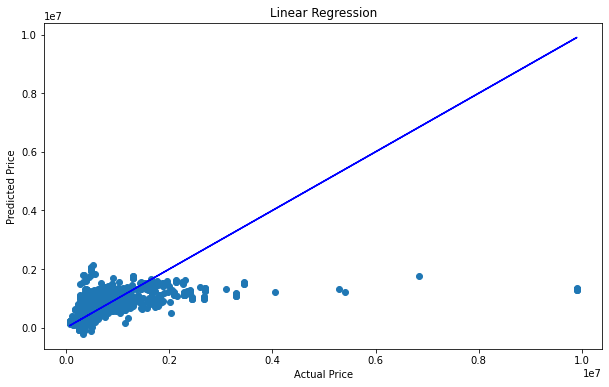

In [94]:
plt.figure(figsize=(10,6))
plt.scatter(x=y_test,y=predLR,cmap='set1')
plt.plot(y_test,y_test,color='b')
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Linear Regression")
plt.show()

## 2. Random forest Regression Model

In [95]:
# Checking R2 score for Random Forest Regressor
RFR=RandomForestRegressor(n_estimators=600, random_state=maxRS)
RFR.fit(x_train,y_train)

# prediction
predRFR=RFR.predict(x_test)
print('R2_Score:',r2_score(y_test,predRFR))
print('Mean abs error:',mean_absolute_error(y_test, predRFR))
print('Mean squared error:',mean_squared_error(y_test, predRFR))
print("Root Mean Squared Error: ", np.sqrt(mean_squared_error(y_test,predRFR)))

R2_Score: 0.9514161523616257
Mean abs error: 84944.57991002557
Mean squared error: 46235712332.01829
Root Mean Squared Error:  215024.91095688957


### Checking the performance of the model by graph

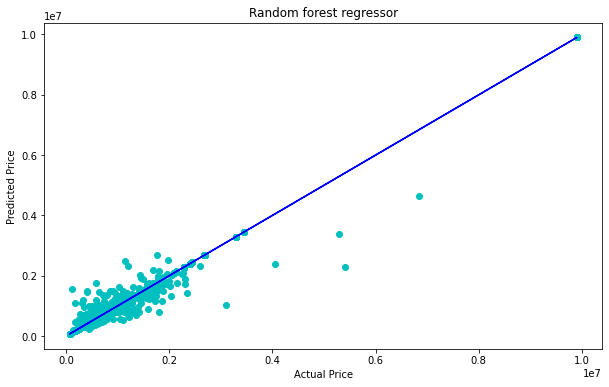

In [96]:
#Verifying the performance of the model by graph
plt.figure(figsize=(10,6))
plt.scatter(x=y_test,y=predRFR,color='c')
plt.plot(y_test,y_test,color='b')
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Random forest regressor")
plt.show()

## 3. KNN Regressor

In [97]:
# Checking R2 score for KNN regressor
knn=KNeighborsRegressor(n_neighbors=9 )
knn.fit(x_train,y_train)

#prediction
predknn=knn.predict(x_test)
print('R2_Score:',r2_score(y_test,predknn))
print('Mean abs error:',mean_absolute_error(y_test, predknn))
print('Mean squared error:',mean_squared_error(y_test, predknn))
print("Root Mean Squared Error: ", np.sqrt(mean_squared_error(y_test,predknn)))

R2_Score: 0.6336624049265533
Mean abs error: 251330.27835220745
Mean squared error: 348631911335.91406
Root Mean Squared Error:  590450.6002502784


### Checking the performance of the model by graph

Text(0.5, 1.0, 'K-nearest neighbors  regressor')

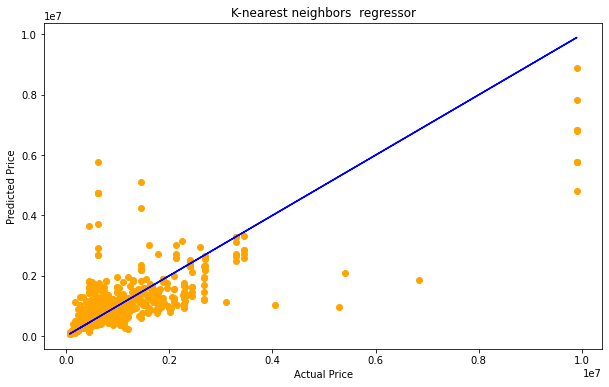

In [98]:
plt.figure(figsize=(10,6))
plt.scatter(x=y_test,y=predknn,color='orange')
plt.plot(y_test,y_test,color='b')
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("K-nearest neighbors  regressor")

## 4. Gradient boosting Regressor

In [101]:
# Checking R2 score for GBR
Gb= GradientBoostingRegressor(n_estimators=400,  random_state=maxRS, learning_rate=0.1, max_depth=3)
Gb.fit(x_train,y_train)

#prediction
predGb=Gb.predict(x_test)
print('R2_Score:',r2_score(y_test,predGb))
print('Mean abs error:',mean_absolute_error(y_test, predGb))
print('Mean squared error:',mean_squared_error(y_test, predGb))
print("Root Mean Squared Error: ", np.sqrt(mean_squared_error(y_test,predGb)))

R2_Score: 0.9550817155983341
Mean abs error: 102938.44305000136
Mean squared error: 42747311647.725655
Root Mean Squared Error:  206754.23006005381


### Checking the performance of the model by graph

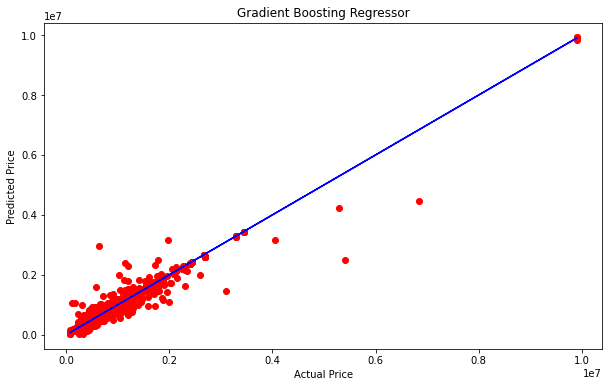

In [102]:
plt.figure(figsize=(10,6))
plt.scatter(x=y_test,y=predGb,color='r')
plt.plot(y_test,y_test,color='b')
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Gradient Boosting Regressor")
plt.show()

## 5. Decision Tree Regressor

In [103]:
# Checking R2 score for GBR
DTR= DecisionTreeRegressor()
DTR.fit(x_train,y_train)

#prediction
predDTR=DTR.predict(x_test)
print('R2_Score:',r2_score(y_test,predDTR))
print('Mean abs error:',mean_absolute_error(y_test, predDTR))
print('Mean squared error:',mean_squared_error(y_test, predDTR))
print("Root Mean Squared Error: ", np.sqrt(mean_squared_error(y_test,predDTR)))

R2_Score: 0.877309466408728
Mean abs error: 109852.28951255539
Mean squared error: 116760703252.8907
Root Mean Squared Error:  341702.65327165765


### Checking the performance of the model by graph

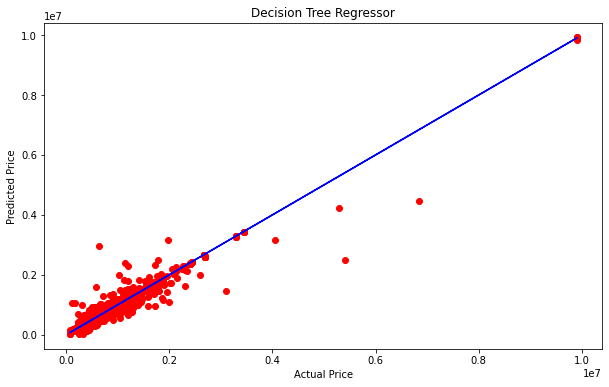

In [104]:
plt.figure(figsize=(10,6))
plt.scatter(x=y_test,y=predGb,color='r')
plt.plot(y_test,y_test,color='b')
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Decision Tree Regressor")
plt.show()

# Cross Validation Score for all the model

In [111]:
#CV Score for Linear Regression
print('CV score for Linear Regression: ',cross_val_score(LR,x,y,cv=5).mean())

#CV Score for Random Forest Regression
print('CV score for Random forest Regression: ',cross_val_score(RFR,x,y,cv=5).mean())

#CV Score for KNN Regression
print('CV score for KNN Regression: ',cross_val_score(knn,x,y,cv=5).mean())

#CV Score for Gradient Boosting Regression
print('CV score for Gradient Boosting Regression: ',cross_val_score(Gb,x,y,cv=5).mean())

#CV Score for Decision Tree Regression
print('CV score for Decision Tree Regression: ',cross_val_score(DTR,x,y,cv=5).mean())

CV score for Linear Regression:  0.15707215392115464
CV score for Random forest Regression:  0.7464943437285952
CV score for KNN Regression:  0.32119277110194466
CV score for Gradient Boosting Regression:  0.7509483931060308
CV score for Decision Tree Regression:  0.5074509918030621


#### So accroding to the R2 score and Cross validation score of all the model we can see that the best model is gradient boosting regressor

# Hyper Parameter Tuning

## The Gradient boosting regressor with GridsearchCV

In [112]:
parameter = {'n_estimators':[100,200,300,400],
             'learning_rate':[0.1,0.01,0.001,1],
             'subsample': [0.1,0.2,0.3,0.5,1],
             'max_depth':[1,2,3,4],
             'alpha':[0.1,0.01,0.001,1]}

In [113]:
CV_GBR = GridSearchCV(GradientBoostingRegressor(),parameter,cv=6,n_jobs = 3,verbose = 2)

In [114]:
CV_GBR.fit(x_train,y_train)

Fitting 6 folds for each of 1280 candidates, totalling 7680 fits


GridSearchCV(cv=6, estimator=GradientBoostingRegressor(), n_jobs=3,
             param_grid={'alpha': [0.1, 0.01, 0.001, 1],
                         'learning_rate': [0.1, 0.01, 0.001, 1],
                         'max_depth': [1, 2, 3, 4],
                         'n_estimators': [100, 200, 300, 400],
                         'subsample': [0.1, 0.2, 0.3, 0.5, 1]},
             verbose=2)

In [115]:
CV_GBR.best_params_

{'alpha': 0.001,
 'learning_rate': 0.1,
 'max_depth': 4,
 'n_estimators': 400,
 'subsample': 0.5}

### Creating Regressor Model with Gradient Boosting Regressor

In [124]:
GBR = GradientBoostingRegressor(n_estimators=400, alpha=0.001,learning_rate= 0.1, max_depth= 4, subsample = 0.5)
GBR.fit(x_train, y_train)

GradientBoostingRegressor(alpha=0.001, max_depth=4, n_estimators=400,
                          subsample=0.5)

In [125]:
#prediction
GBRpred = GBR.predict(x_test)
#R2 score
acc = r2_score(y_test,GBRpred)
print(acc*100)

95.60799200909335


#### So after the Hypertuning now we have got a descent accuracy score of 95% on Gradient boosting

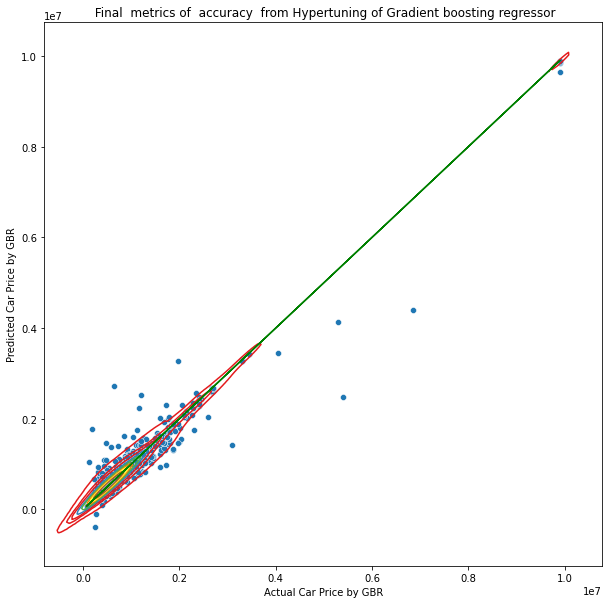

In [130]:
#Verifying the final  performance of the model by graph
plt.figure(figsize=(10,10))
sns.scatterplot(x=y_test,y=GBRpred,palette='Set2')
sns.kdeplot(x=y_test,y=GBRpred, cmap='Set1')
plt.plot(y_test,y_test,color='g')
#Verifying the performance of the model by graph
plt.xlabel("Actual Car Price by GBR")
plt.ylabel("Predicted Car Price by GBR")
plt.title(" Final  metrics of  accuracy  from Hypertuning of Gradient boosting regressor")
plt.show()

### Saving The Predictive Model

In [127]:
#saving the model at local file system
filename='Car_price_prediction.pickle'
pickle.dump(CV_GBR,open(filename,'wb'))
#prediction using the saved model
loaded_model = pickle.load(open(filename, 'rb'))
loaded_model.predict(x_test)

array([269749.29289177, 987743.58442385, 248275.27762108, ...,
       489395.96421464, 951552.21719589, 480377.64595771])

### Checking predicted and original values

In [128]:
a = np.array(y_test)
predict = np.array(loaded_model.predict(x_test))
Car_price_prediction = pd.DataFrame({"Original":a,"Predicted":predict},index= range(len(a)))
Car_price_prediction

,Original,Predicted
0,265000.0,269749.292892
1,1084099.0,987743.584424
2,250000.0,248275.277621
3,603699.0,484027.938572
4,500000.0,485828.152206
...,...,...
1349,568000.0,575641.211734
1350,603299.0,545538.231397
1351,509999.0,489395.964215
1352,794499.0,951552.217196


### Let's plot and visualize

Text(0.5, 1.0, 'Original vs predicted  graph')

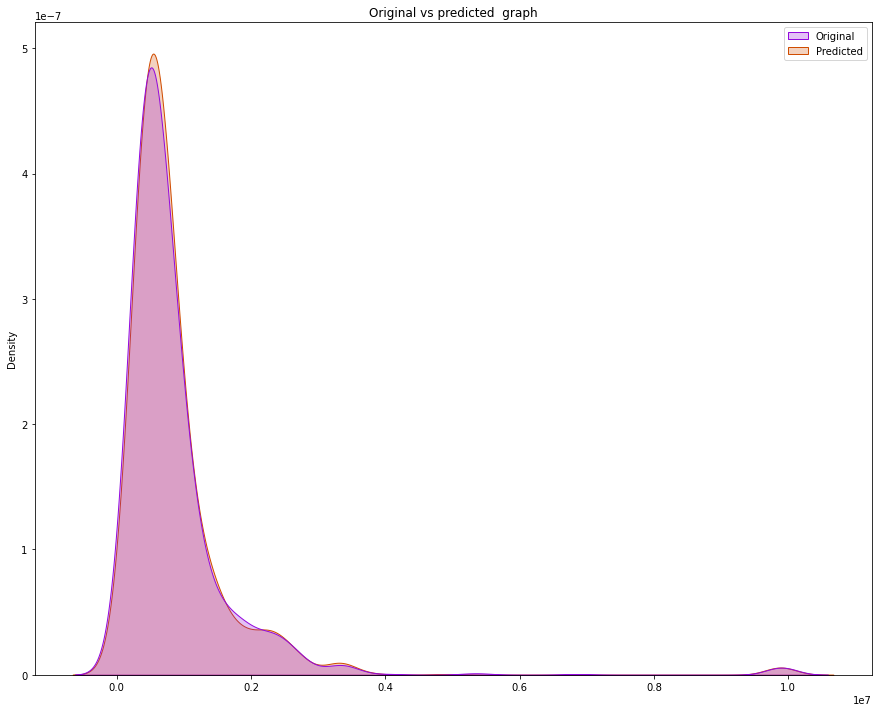

In [129]:
plt.figure(figsize=(15,12))
sns.kdeplot(data=Car_price_prediction, palette='gnuplot',gridsize=900, shade=True)
plt.title('Original vs predicted  graph')

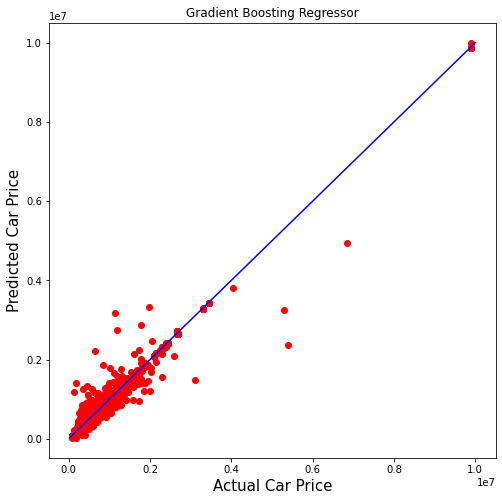

In [131]:
plt.figure(figsize=(8,8))
plt.scatter(y_test,predict,c='r')
plt1 = max(max(predict),max(y_test))
plt2 = min(min(predict),min(y_test))
plt.plot([plt1,plt2],[plt1,plt2],'b-')
plt.xlabel('Actual Car Price',fontsize=15)
plt.ylabel('Predicted Car Price',fontsize=15)
plt.title("Gradient Boosting Regressor")
plt.show()

### Saving the model in CSV format

In [132]:
model =Car_price_prediction.to_csv('car_price_prediction.csv')
model